## Overview

In this notebook, we will work with 2016–2018 lightning strike data from the National Oceanic and Atmospheric Association (NOAA) to calculate weekly sums of lightning strikes and plot them on a bar graph. Then, we will calculate quarterly lightning strike totals and plot them on bar graphs.

In [28]:
# Import statements
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd


ModuleNotFoundError: No module named 'geopandas'

In [3]:
# Read in the data.
file_path = "../data/raw/NOAA_lightning_strikes_2009_to_2018.csv"
df = pd.read_csv(file_path)
df.head()

,date,number_of_strikes,x_coord,y_coord
0,2012-09-15,2,-68.8,49.5
1,2012-09-15,2,-85.7,22.8
2,2012-09-15,2,-95.6,25.8
3,2012-09-15,2,-79.5,26.0
4,2012-09-15,2,-88.7,29.1


In [4]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [6]:
# Create four new columns.
df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')

In [7]:
df.head(10)

,date,number_of_strikes,x_coord,y_coord,week,month,quarter,year
0,2012-09-15,2,-68.8,49.5,2012-W37,2012-09,2012-Q3,2012
1,2012-09-15,2,-85.7,22.8,2012-W37,2012-09,2012-Q3,2012
2,2012-09-15,2,-95.6,25.8,2012-W37,2012-09,2012-Q3,2012
3,2012-09-15,2,-79.5,26.0,2012-W37,2012-09,2012-Q3,2012
4,2012-09-15,2,-88.7,29.1,2012-W37,2012-09,2012-Q3,2012
5,2012-09-15,2,-72.0,47.2,2012-W37,2012-09,2012-Q3,2012
6,2012-09-15,2,-85.9,22.7,2012-W37,2012-09,2012-Q3,2012
7,2012-09-15,2,-71.5,47.6,2012-W37,2012-09,2012-Q3,2012
8,2012-09-15,2,-109.4,28.7,2012-W37,2012-09,2012-Q3,2012
9,2012-09-15,2,-113.4,27.8,2012-W37,2012-09,2012-Q3,2012


In [9]:
# Create a new datafram view of just 2018 data, summed by week.
df_by_week_2018 = df[df['year'] == '2018'].groupby(['week']).sum(numeric_only=True).reset_index()
df_by_week_2018.head()

,week,number_of_strikes,x_coord,y_coord
0,2018-W01,34843,-519332.5,202659.5
1,2018-W02,353425,-1716484.7,578854.7
2,2018-W03,37132,-454281.1,182666.4
3,2018-W04,412772,-2078334.3,748759.5
4,2018-W05,34972,-366901.4,127787.4


Now we have a table of exactly what we need to plot the weekly lightning strike totals of 2018. We will use the plt.bar() function to plot the bar graph. Within the argument field, let's input the x-axis (the week column), then input the y-axis (or height) as the number_of_strikes column.

We will use plt.xlabel(), plt.ylabel(), and plt.title() to add appropriate text to the graph.

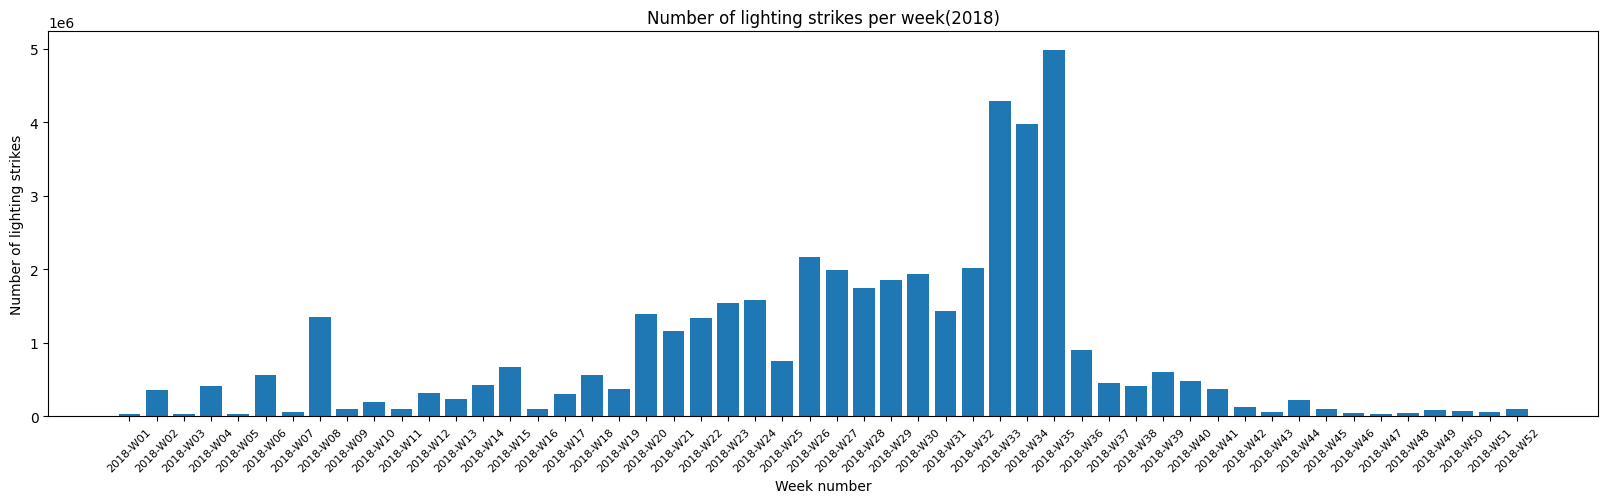

In [13]:
# Plot a bar graph of weekly strike totals in 2018.
plt.figure(figsize =(20,5))
plt.bar(x = df_by_week_2018['week'], height=df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lighting strikes")
plt.title("Number of lighting strikes per week(2018)")
plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis lables and decrease font size
plt.show()

Plot the number of quarterly lightning strikes from 2016–2018
Next, let's plot lightning strikes by quarter for the full date range of available data. For a visualization, it will be easiest to work with numbers in millions, such as 25.2 million. As an example, the following code will divide the number_of_strikes column by one million.

In [14]:
df_by_quarter =df['number_of_strikes'].div(1000000)
df_by_quarter.head()

0    0.000002
1    0.000002
2    0.000002
3    0.000002
4    0.000002
Name: number_of_strikes, dtype: float64

Format the numbers
This alone does not help much, because it just moved the decimal to the left. We will need to format the numbers as well. Let's begin by grouping the data by quarter and summing.

Then, we will create a number_of_strikes_formatted column in the resulting dataframe by dividing by one million but also rounding to one digit after the decimal point, converting it to a string, and adding "M" to the end to represent millions.

In [18]:
# Group 2016-2018 data by quarter and sum.
df_by_quarter = df.groupby(['quarter']).sum(numeric_only=True).reset_index()

# Format as text, in millions.
df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str) + 'M'

df_by_quarter.head()

,quarter,number_of_strikes,x_coord,y_coord,number_of_strikes_formatted
0,2009-Q1,1028056,-12704674.2,4953070.5,1.0M
1,2009-Q2,12364522,-90836285.4,35396494.6,12.4M
2,2009-Q3,15139666,-131799599.7,50061276.6,15.1M
3,2009-Q4,1568341,-19225017.4,7005774.6,1.6M
4,2012-Q1,2293162,-25230220.9,9857223.4,2.3M



## Add labels
Before we start plotting, let's write a function that will help label each bar in the plot with its corresponding number_of_strikes_formatted text. The function uses plt.text(), which is a pyplot function whose positional arguments are x, y, and s. x represents the x-axis coordinates, y represents the y-axis coordinates, and s represents the text that we want to appear at these coordinates.

In [19]:
def addlabels(x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

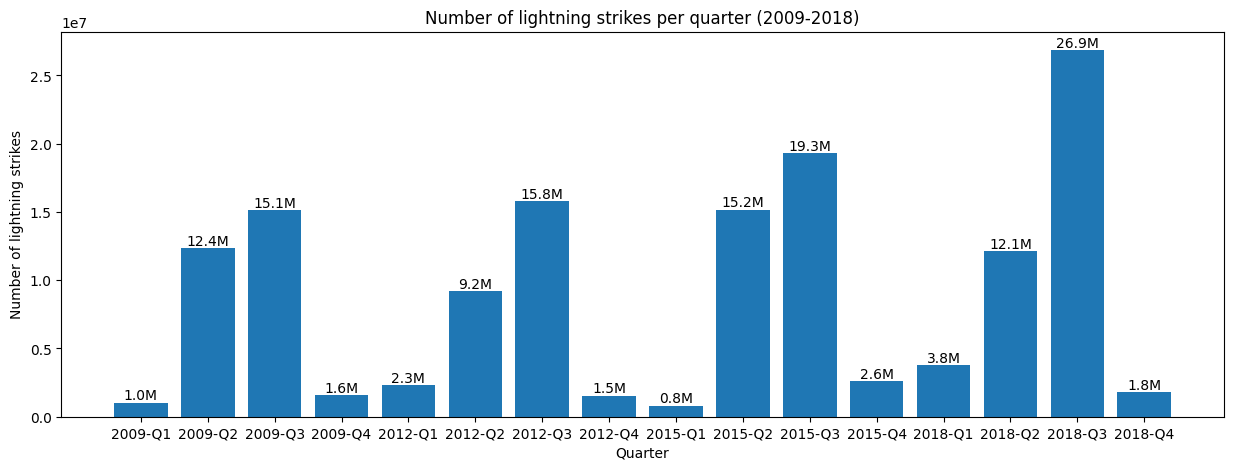

In [21]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_quarter['quarter'], height = df_by_quarter['number_of_strikes'])
addlabels(df_by_quarter['quarter'], df_by_quarter['number_of_strikes'], df_by_quarter['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2009-2018)')
plt.show()

### Create a grouped bar chart
Now, we will create a grouped bar chart to better compare year-over-year changes each quarter. We can do this by creating two new columns that break out the quarter and year from the quarter column. We will use the quarter column and take the last two characters to get quarter_number, and take the first four characters to get year.

In [22]:
# Create two new columns.
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()

,quarter,number_of_strikes,x_coord,y_coord,number_of_strikes_formatted,quarter_number,year
0,2009-Q1,1028056,-12704674.2,4953070.5,1.0M,Q1,2009
1,2009-Q2,12364522,-90836285.4,35396494.6,12.4M,Q2,2009
2,2009-Q3,15139666,-131799599.7,50061276.6,15.1M,Q3,2009
3,2009-Q4,1568341,-19225017.4,7005774.6,1.6M,Q4,2009
4,2012-Q1,2293162,-25230220.9,9857223.4,2.3M,Q1,2012


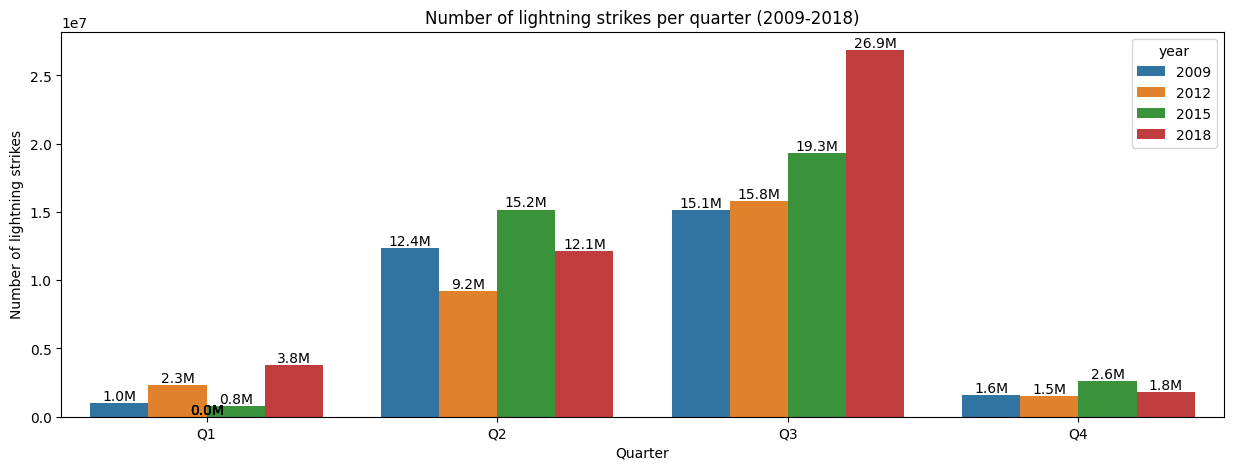

In [24]:
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M', 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2009-2018)")
plt.show()

In [31]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
 
# Convert coordinates properly
df['longitude'] = df['x_coord'] / 1e6  
df['latitude'] = df['y_coord'] / 1e6  

# Convert `year` to string for categorical color mapping
df['year'] = df['year'].astype(str)

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot
fig, ax = plt.subplots(figsize=(15, 7))

# Plot world map as background
world.plot(ax=ax, color='lightgray')

# Create scatter plot with seaborn
sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    size='number_of_strikes',  # Scale marker size based on strikes
    hue='year',  # Color based on year
    alpha=0.6, 
    palette='tab10', 
    edgecolor="black"
)

# Labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Global Lightning Strikes by Quarter (2009-2018)")

# Show the map
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


ModuleNotFoundError: No module named 'geopandas'